# 베이즈 확률

* A와 B가 각자 자신의 승리에 베팅한다고 가정하자.

* 먼저 6점을 얻는 사람이 승리하며, 현재 A는 5점, B는 3점이다.

* 공정한 배당률은 얼마인가?

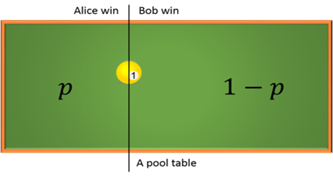




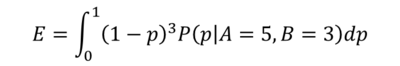

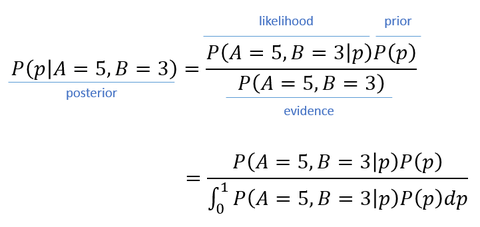

* 사전 확률 (prior probability): 새로운 데이터가 주어지기 전, 어떤 사건이 일어날 가능성에 대한 확률

* 가능도 (likelihood): 특정 사건이 일어났다고 가정했을 때, 새로 관찰된 데이터가 실제로 관찰될 확률

* 사후 확률 (posterior probability): 사전 확률과 새롭게 얻은 데이터(가능도)를 이용해 다시 계산한 사건의 확률

# LDA

* L (Latent): 베이즈 규칙에 기반하여 확률적 추론(stochastic inference)을 통해 잠재적인 주제 생성 확률(latent probability)을 추정한다.

* D (Dirichlet): 단어가 등장할 확률을 계산할 때 켤레 분포(conjugate distribution)인 디리클레(Dirichlet) 매개변수를 사용한다.

* A (Allocation): 미리 설정된 디리클레 분포를 이용해 각 문서를 주제에 '할당(allocate)'한다.

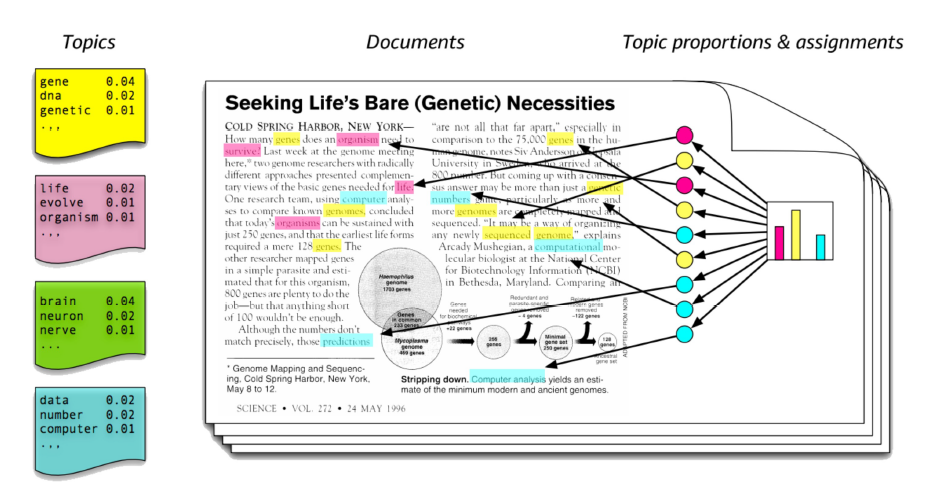

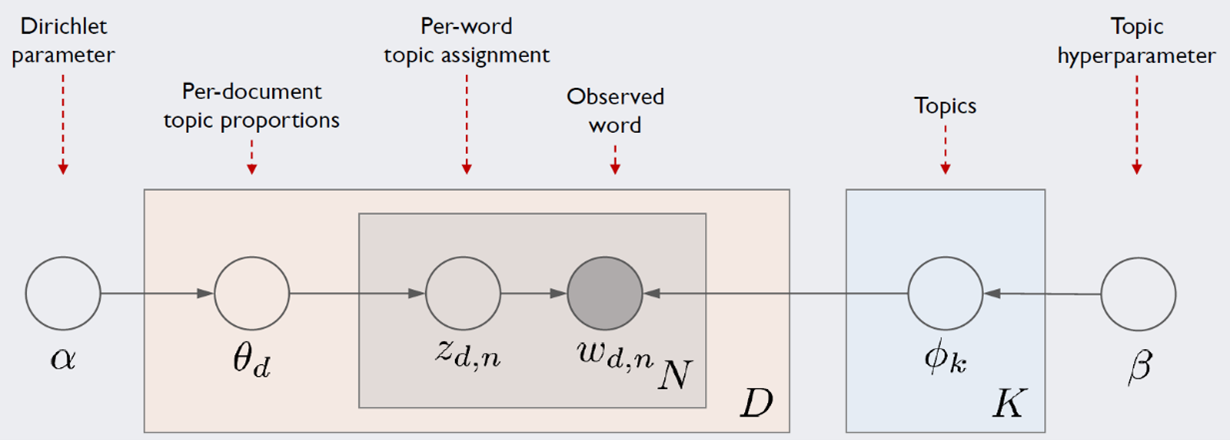


# 토픽 모델링 과정

In [1]:
# 현재 tomotopy 가 코랩의 파이썬 기본 환경과 충돌이 발생하고 있음
# 이 코드 박스 실행 후 런타임 - 세션 다시 시작을 진행한 후, 다음 코드부터 진행함

!pip install tomotopy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 40.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
import pandas as pd
import tomotopy as tp
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab/공정성/df100_final1524 v2.csv', encoding='utf-8', lineterminator='\n')
print(len(df))
df.head()

21913


,Date,Url,Title,Content,News,Style,Year,Char,Nouns,Nouns_cleaned,Admin,Period\r
0,2022.12.31,https://www.chosun.com/national/court_law/2022...,이원석 총장 “거짓 주장으로 檢 비난... 휩쓸리지 않고 할일해야”,이원석 검찰총장은 “검찰의 일에 대해 비판을 넘어선 거짓 주장과 근거 없는 비난을 ...,조선,Con,2022,102,이원석 검찰 총장 검찰 비판 거짓 주장 근거 비난 총장 이날 배포 신년사 검·경 수...,이원석 검찰 총장 검찰 비판 거짓 주장 근거 비난 총장 배포 신년사 검·경 수사 조...,Con,8
1,2022.12.31,https://www.chosun.com/national/incident/2022/...,‘자격 미달’ 아들 채용하려고 직원에 폭언하고 채용기준 바꾼 ‘기관장’,자신의 아들을 공무직으로 채용하려고 직원에게 폭언하며 채용기준을 바꿔 별다른 경력이...,조선,Con,2022,141,자신 아들 공무 채용 직원 폭언 채용 기준 경력 자격증 아들 강원도청 산하 기관장 ...,아들 공무 채용 직원 폭언 채용 기준 경력 자격증 아들 강원도청 산하 기관장 항소심...,Con,8
2,2022.12.30,https://www.chosun.com/entertainments/broadcas...,'보이즈 플래닛' 미리보기 오늘(30일) 방송..참가자들 첫 공개,[OSEN=지민경 기자] 글로벌 팬 메이드 K-POP 아이돌 프로젝트 Mnet '보...,조선,Con,2022,187,지민경 기자 글로벌 메이드 아이돌 프로젝트 보이즈 플래닛 내년 목요일 방송 예열 시...,지민경 글로벌 메이드 아이돌 프로젝트 보이즈 플래닛 내년 목요일 방송 예열 시작 오...,Con,8
3,2022.12.29,https://www.chosun.com/politics/politics_gener...,"이재명 “尹정부 검찰은 민주주의 파괴 도구, 어떻게 제재할지 논의”",더불어민주당 이재명 대표는 29일 “윤석열 정부의 검찰이 공익의 대변자라는 책무를 ...,조선,Con,2022,123,더불어민주당 이재명 대표 윤석열 정부 검찰 공익 대변자 책무 망각 민주주의 파괴 도...,더불어민주당 이재명 대표 윤석열 정부 검찰 공익 대변자 책무 망각 민주주의 파괴 도...,Con,8
4,2022.12.29,https://www.chosun.com/economy/mint/2022/12/29...,규제는 계속 늘어난다...정부가 ‘포획’되기 때문에,보수와 진보를 막론하고 정부가 바뀔 때마다 항상 내거는 구호 중 하나가 ‘규제 개혁...,조선,Con,2022,241,보수 진보 정부 구호 규제 개혁 국민 산업 발전 저해 규제 모두 동의 의미 후생 경...,보수 진보 정부 구호 규제 개혁 국민 산업 발전 저해 규제 모두 동의 의미 후생 경...,Con,8


# 최적화 과정

* 주제 수에 따른 결과를 검증하기 위한 확인 단계
* 일반적으로 사용되는 주요 지표: Perplexity와 Coherence
---

### Perplexity

- 정의:
  Perplexity는 확률적 토픽 모델이 보지 않은(new/unseen) 문서 샘플을 얼마나 잘 예측하는가를 측정하는 지표이다. LDA(Latent Dirichlet Allocation)와 같은 모델의 성능 평가에 자주 사용된다.

- 수학적 의미:
  Perplexity는 모델이 데이터를 예측할 때 느끼는 혼란(confusion) 정도를 수치화한 것이다.
  → Perplexity 값이 낮을수록 모델이 일반화 성능이 좋음을 의미한다.

- 해석:
  - 낮은 Perplexity → 문서 예측력이 높음
  - 높은 Perplexity → 문서를 잘 설명하지 못함

- 한계점:
Perplexity는 명확한 수치 지표이지만, 사람이 이해하기 쉬운 토픽(해석 가능성)와 항상 일치하지는 않는다.

---
### Coherence

- 정의:  
  Coherence는 한 주제 내에서 **상위 단어들 간의 의미적 유사도(semantic similarity)**를 측정한다.
  즉, 토픽 내 주요 단어들이 사람의 관점에서 함께 등장할 때 의미적으로 일관성 있는지를 평가한다..

- 계산 방법:  
  일반적으로 한 주제의 상위 N개 단어가 문서 내에서 얼마나 자주 함께 등장하는지를 측정한다.

  대표적인 계산 방식으로는 c_v, u_mass, c_uci 등이 있다.

- 해석:
  - 높은 Coherence → 상위 단어들이 자주 함께 등장하고 의미적으로 밀접 → 사람이 해석하기 좋은 주제
  - 낮은 Coherence → 상위 단어들 간의 연관성이 약함 → 주제 해석이 어려움

- 장점:
  Coherence는 인간의 직관적 판단과 해석 가능성과 더 잘 맞아떨어지므로, 최근에는 perplexity보다 모델 선택의 기준으로 더 선호되는 추세이다.

---
* Perplexity와 Coherence 비교 및 주제 수 결정

  - Perplexity와 Coherence 값을 함께 비교하여 적절한 주제(topic) 수를 도출한다.

  - Perplexity ↓ 낮을수록 좋음

  - Coherence ↑ 높을수록 좋음

- 주의점:

  * 두 지표 모두 동시에 이상적으로 맞는 경우는 드물다.

  * 토픽 모델링은 주제 수에 대해 정답이나 절대적 기준이 존재하지 않는다.

  * (모델의 파라미터 설정에 따라 값이 크게 달라지므로 참고용 지표로만 활용해야 함)

  * 따라서 토픽 모델링 전 단계에서 철저한 전처리 과정이 필수적이다.


In [3]:
def compute_coherence_values(doc, start, limit, step):  # doc: 문서 리스트, start~limit: 토픽 수 범위, step: 간격
    for i in range(start, limit, step):  # 지정한 범위 내에서 토픽 개수를 바꿔가며 반복
        mdl = tp.LDAModel(k=i, seed=7777)  # LDA 모델 생성 (k: 토픽 수), seed 고정으로 결과 재현 가능
        mdl.burn_in = 100  # 초기 100번의 학습 결과는 버림 (수렴 전 노이즈 제거 목적)

        for text in doc:  # 모든 문서에 대해 반복
            token = text.split()  # 문장을 공백 기준으로 토큰화
            if token:
                mdl.add_doc(token)  # 모델에 토큰화된 문서 추가

        mdl.train(iter=300, workers=0)  # 모델 학습 수행 (300회 반복, 병렬 처리 X)

        coh = tp.coherence.Coherence(mdl, coherence='c_v')  # c_v coherence 계산기 설정
        coherence_per_topic = coh.get_score()  # Coherence 점수 추출
        perplexity_per_topic = mdl.perplexity  # Perplexity 점수 추출

        # 결과 출력
        print('Topic: {}\tLog-likelihood: {}\tPerplexity: {}\tCoherence: {}'\
        .format(
            i,  # 토픽 수
            mdl.ll_per_word,  # 단어 당 로그 우도
            perplexity_per_topic,  # Perplexity
            coherence_per_topic  # Coherence
            )
        )

        # store to compare these parameters later
        coherence_values.append(coherence_per_topic)  # Coherence 리스트에 저장
        perplexities.append(perplexity_per_topic)  # Perplexity 리스트에 저장
        loglikelihoods.append(mdl.ll_per_word)  # 로그 우도 리스트에 저장


In [4]:
limit = 30 # 최대 토픽 수 (30개까지 시도)
start = 20 # 최소 토픽 수 (15개부터 시작)
step = 1 # 토픽 수 증가 단위 (1씩 증가)

coherence_values = []  # Coherence 값을 저장할 리스트 초기화
perplexities = []  # Perplexity 값을 저장할 리스트 초기화
loglikelihoods = []  # 로그 우도 값을 저장할 리스트 초기화

compute_coherence_values(df['Nouns_cleaned'], start, limit+1, step) # (토픽 수마다 모델 학습 반복하므로 시간 오래 걸림)

/tmp/ipython-input-653856236.py:11: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(iter=300, workers=0)  # 모델 학습 수행 (300회 반복, 병렬 처리 X)


Topic: 20	Log-likelihood: -8.118453925447556	Perplexity: 3355.828371368465	Coherence: 0.7086139713414014
Topic: 21	Log-likelihood: -8.10171862629122	Perplexity: 3300.1349029182575	Coherence: 0.7122302617700327
Topic: 22	Log-likelihood: -8.106124931905029	Perplexity: 3314.7083899067566	Coherence: 0.7303842538798396
Topic: 23	Log-likelihood: -8.112328828485296	Perplexity: 3335.3364188691558	Coherence: 0.7111998480542198
Topic: 24	Log-likelihood: -8.100038856720998	Perplexity: 3294.5960899977786	Coherence: 0.7320566732746859
Topic: 25	Log-likelihood: -8.090341514005797	Perplexity: 3262.801672444401	Coherence: 0.6918082798458636
Topic: 26	Log-likelihood: -8.100053713529487	Perplexity: 3294.6450375445384	Coherence: 0.7168134007235774
Topic: 27	Log-likelihood: -8.089129478866935	Perplexity: 3258.8494377737406	Coherence: 0.7253849397827353
Topic: 28	Log-likelihood: -8.079863847133005	Perplexity: 3228.7935972110804	Coherence: 0.7342688967872943
Topic: 29	Log-likelihood: -8.089449364677733	Perp

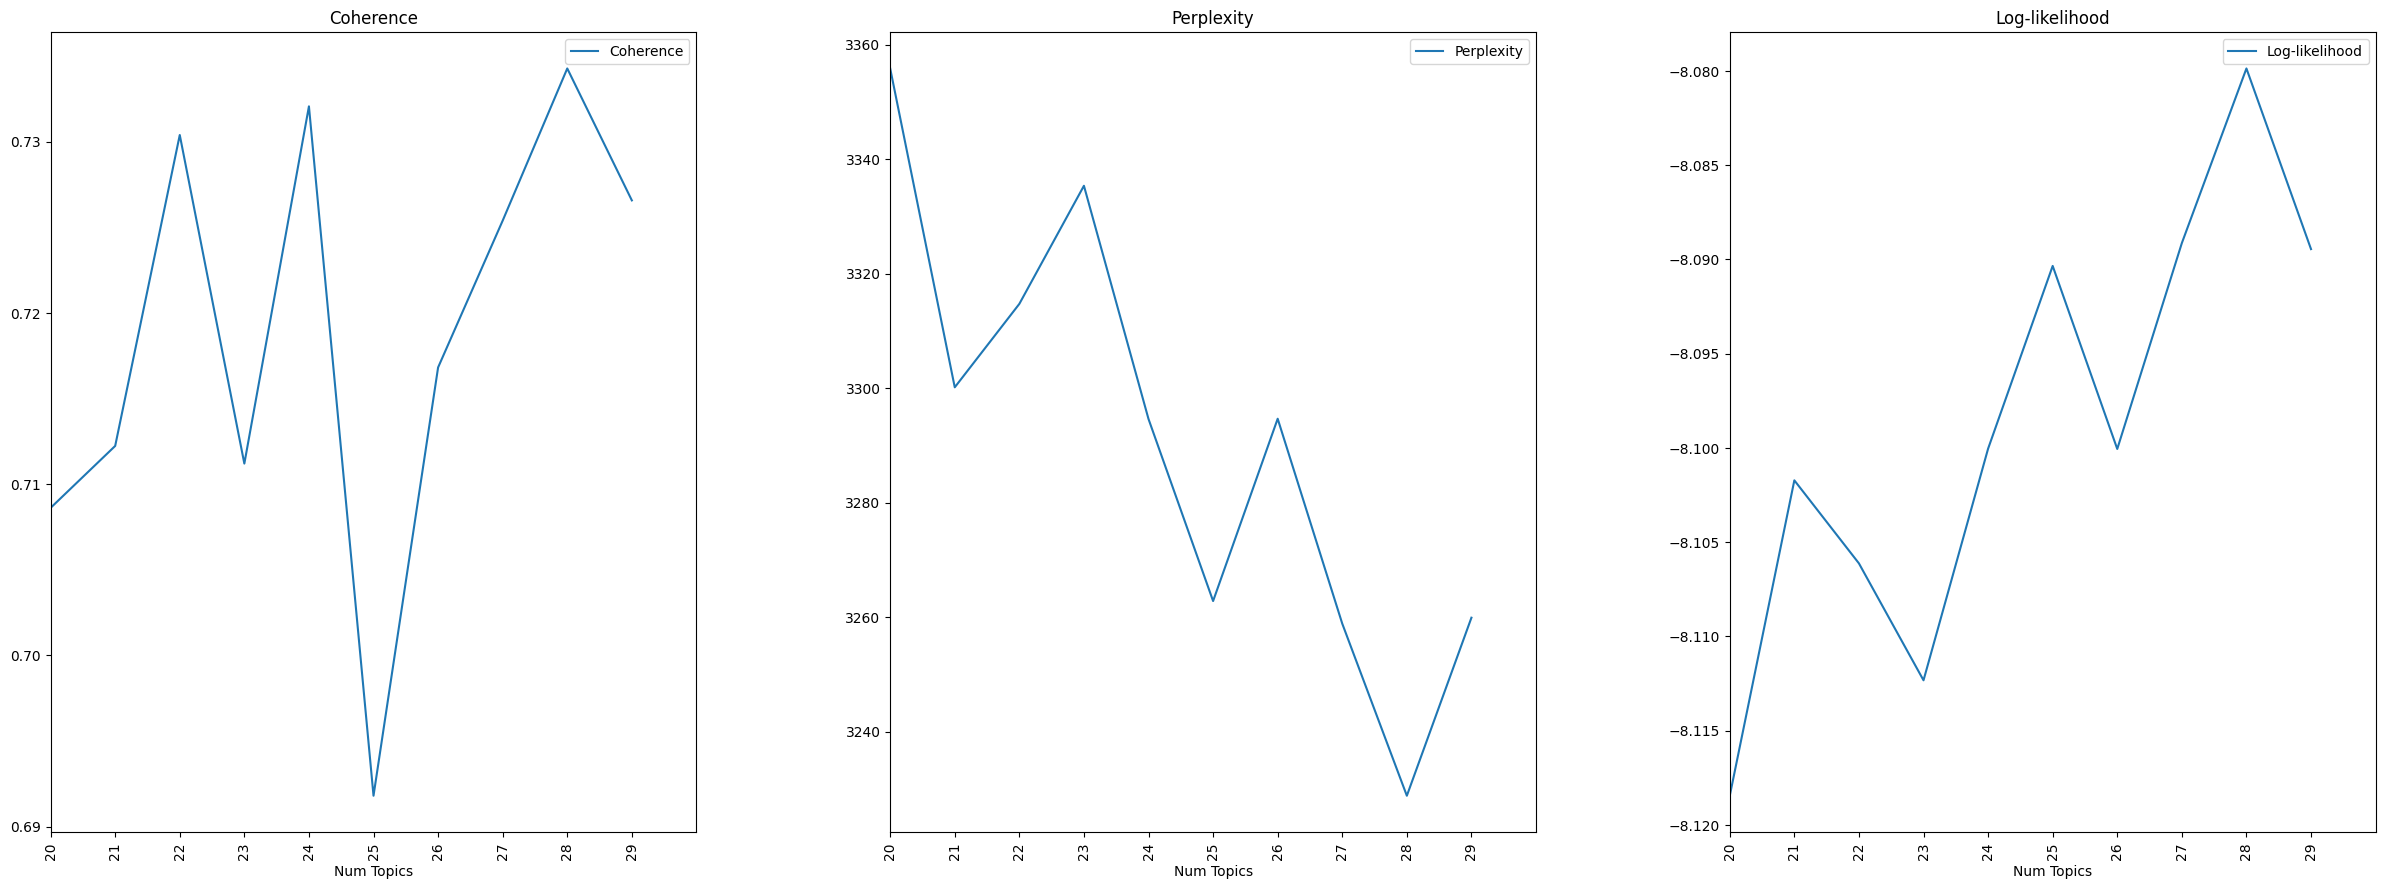

In [5]:
# 시작 토픽 수, 끝 토픽 수, 증가 단위 설정
x = range(start, limit, step)

# Coherence, Perplexity, Log-likelihood 결과를 데이터프레임으로 생성
mdl_check = pd.DataFrame(list(zip(x, coherence_values, perplexities, loglikelihoods)),
                         columns=['Num Topics', 'Coherence', 'Perplexity', 'Log-likelihood'])

fig, ax = plt.subplots(figsize=(30,10), nrows=1, ncols=3) # 1행 3열 서브플롯 생성
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, # 서브플롯 간 여백 설정
                    wspace=0.3, hspace=0.5)
1
mdl_check.plot(x='Num Topics', y='Coherence', kind='line', ax=ax[0], title='Coherence', rot=90) # 서브플롯 간 여백 설정
mdl_check.plot(x='Num Topics', y='Perplexity', kind='line', ax=ax[1], title='Perplexity', rot=90) # Perplexity 값 시각화
mdl_check.plot(x='Num Topics', y='Log-likelihood', kind='line', ax=ax[2], title='Log-likelihood', rot=90) # Log-likelihood 값 시각화

ticks = list(range(start, limit, step))
for a in ax:
    a.set_xticks(ticks)
    a.set_xlim(start, limit)  # 20 ~ 30 범위로 고정
plt.show()

In [ ]:
# 위에서 적절한 토픽 수를 확인하고 다시 처리

mdl = tp.LDAModel(k=28, seed=7777)
mdl.burn_in = 100

for text in df['Nouns_cleaned']:
    token = text.split()
    if token:
        mdl.add_doc(token)

mdl.train(iter=300, workers=0)

/tmp/ipython-input-2179126262.py:11: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(iter=300, workers=0)


In [ ]:
for k in range(mdl.k):
    print('Top 10 words of topic #{}'.format(k))
    print(mdl.get_topic_words(k, top_n=10)) # 각 토픽별 등장 확률이 높은 10개 키워드 확인하기

Top 10 words of topic #0
[('사업', 0.028643745929002762), ('주택', 0.013340514153242111), ('업체', 0.012441575527191162), ('계약', 0.011861787177622318), ('평가', 0.011292636394500732), ('지원', 0.010712848044931889), ('선정', 0.01020220760256052), ('개발', 0.010095824487507343), ('가격', 0.009388376027345657), ('부동산', 0.008010712452232838)]
Top 10 words of topic #1
[('혐의', 0.044597528874874115), ('선고', 0.027683347463607788), ('기소', 0.02020035870373249), ('징역', 0.017543289810419083), ('재판부', 0.0168907567858696), ('재판', 0.015571611002087593), ('피고인', 0.012783094309270382), ('검찰', 0.011853588744997978), ('구속', 0.011412308551371098), ('법원', 0.010224606841802597)]
Top 10 words of topic #2
[('수사', 0.09612738341093063), ('경찰', 0.040284108370542526), ('검찰', 0.03918622061610222), ('공수처', 0.03030872344970703), ('의혹', 0.015077386051416397), ('범죄', 0.01315980777144432), ('검사', 0.01221592165529728), ('영장', 0.011575072072446346), ('혐의', 0.00886264257133007), ('조사', 0.008465216495096684)]
Top 10 words of topic #3
[('

In [ ]:
# 확률은 제외하고 키워드만 확인하기

for i in range(mdl.k):
    res = mdl.get_topic_words(i, top_n=10)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res)) # between words and its probability, only print out words

Topic #0	사업, 주택, 업체, 계약, 평가, 지원, 선정, 개발, 가격, 부동산
Topic #1	혐의, 선고, 기소, 징역, 재판부, 재판, 피고인, 검찰, 구속, 법원
Topic #2	수사, 경찰, 검찰, 공수처, 의혹, 범죄, 검사, 영장, 혐의, 조사
Topic #3	조사, 의혹, 감사, 공개, 위원회, 확인, 자료, 제기, 감사원, 여사
Topic #4	교육, 대학, 평가, 학생, 전형, 학교, 교육부, 입시, 수능, 대입
Topic #5	프로그램, 방송, 투표, 시청자, 제작진, 공정, 음악, 논란, 시즌, 무대
Topic #6	영화, 수상, 문화, 심사, 작품, 올해, 시상식, 부문, 예술, 선정
Topic #7	징계, 처분, 소송, 신청, 결정, 법원, 절차, 헌법, 판단, 정지
Topic #8	정치, 사회, 공정, 비판, 권력, 국민, 시민, 민주주의, 역사, 중요
Topic #9	검찰, 수사, 총장, 장관, 검사, 법무부, 감찰, 대검, 인사, 지휘
Topic #10	금융, 회장, 기업, 주주, 주식, 회사, 경영, 거래, 시장, 투자
Topic #11	제도, 위원회, 방안, 개선, 논의, 개정, 공정, 국회, 강화, 마련
Topic #12	기술, 뉴스, 정보, 서비스, 기업, 네이버, 플랫폼, 지능, 인공, 포털
Topic #13	선수, 스포츠, 체육, 대회, 올림픽, 회장, 대표, 종목, 협회, 문체부
Topic #14	경제, 정부, 정책, 사회, 공정, 성장, 국민, 소득, 청년, 기업
Topic #15	채용, 정규직, 임금, 직원, 노조, 기관, 노동, 공공, 공정, 면접
Topic #16	위원, 후보자, 위원장, 인사, 위원회, 심사, 추천, 이사, 임명, 후보
Topic #17	대통령, 국민, 정부, 국회, 청와대, 문재인, 특검, 국정, 장관, 야당
Topic #18	미국, 중국, 북한, 대통령, 트럼프, 일본, 정부, 한국, 국가, 국제
Topic #19	교수, 여성, 사회, 연구, 한국, 세대, 남성, 공정, 대학, 논문

# Look inside deeply

In [ ]:
# 각 토픽별로 연결된 문서를 확인하기 위한 리스트 생성 (토픽 개수만큼 빈 리스트 준비)
top_docs = [[] for _ in range(mdl.k)]

# 전체 문서들을 반복
for doc in mdl.docs:
    # 해당 문서에서 가장 높은 확률의 토픽을 추출 (top_n=1)
    # get_topics()는 [(토픽번호, 확률)] 형태로 반환되므로, 첫 번째 토픽의 번호만 추출
    top_docs[doc.get_topics(top_n=1)[0][0]].append(doc)  # 추출된 토픽 번호에 해당하는 리스트에 문서 추가

In [ ]:
# compare the result below

print(mdl.docs[0].get_topics(top_n=1)[0])
print(mdl.docs[0].get_topics(top_n=1)[0][0])

(9, 0.3377520740032196)
9


In [ ]:
# The number of documents per topics

numdocs = []

for k in range(mdl.k):
    numdocs.append(len(top_docs[k]))
    print(f'Num docs belonging to topic {k}: {len(top_docs[k])}')

Num docs belonging to topic 0: 686
Num docs belonging to topic 1: 1263
Num docs belonging to topic 2: 869
Num docs belonging to topic 3: 681
Num docs belonging to topic 4: 1550
Num docs belonging to topic 5: 713
Num docs belonging to topic 6: 505
Num docs belonging to topic 7: 611
Num docs belonging to topic 8: 924
Num docs belonging to topic 9: 1304
Num docs belonging to topic 10: 645
Num docs belonging to topic 11: 557
Num docs belonging to topic 12: 732
Num docs belonging to topic 13: 614
Num docs belonging to topic 14: 886
Num docs belonging to topic 15: 794
Num docs belonging to topic 16: 711
Num docs belonging to topic 17: 825
Num docs belonging to topic 18: 617
Num docs belonging to topic 19: 295
Num docs belonging to topic 20: 687
Num docs belonging to topic 21: 776
Num docs belonging to topic 22: 771
Num docs belonging to topic 23: 1252
Num docs belonging to topic 24: 1141
Num docs belonging to topic 25: 397
Num docs belonging to topic 26: 594
Num docs belonging to topic 27: 5

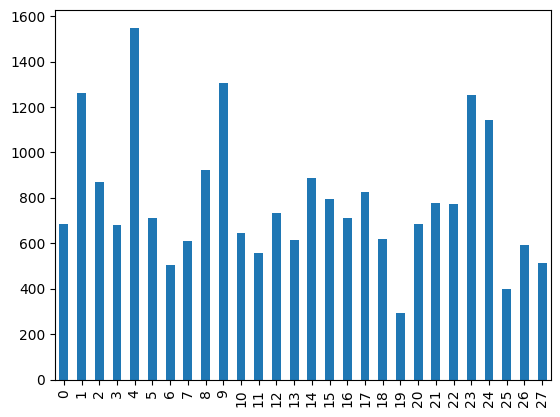

In [ ]:
# 최상위 비중을 차지하는 토픽별 문서 개수 확인하기

x = range(1, mdl.k+1)
y = numdocs

df_docs = pd.DataFrame(zip(x, y), columns=['Topic', 'The number of TP'])

df_docs['The number of TP'].sort_index().plot.bar();

In [ ]:
# 6번째 토픽에 해당하는 분석 자료 찾기

for item in top_docs[5][0:20]:
    print(item)

<tomotopy.Document with words="지민경 글로벌 메이드 아이돌 프로젝트 보이즈 플래닛 내년 목요일 방송 예열 시작 오늘 오후 보이즈 플래닛 프리뷰 에피소드 보이즈 플래닛 스타 이즈 본 방송 보이즈 플래닛 댄스 마스터 구영 최영준 오디션 프로그램 출신 그룹 워너원 지성 김재환 그룹 아이즈 최예나 그룹 케플러 최유진 샤오팅 마시로 김채현 히카루 서영은 출연 보이즈 플래닛 스타 이즈 본 다양 매력 참가자 사전 오디션 영상 소년 면면 탐구 보이즈 플래닛 차별점 스포일러 언급 방송 기대감 고조 예정 보이즈 플래닛 참가자 엠카운트다운 시그널 무대 세계 국가 지역 최종 선발 참가자 스토리 퍼포먼스 방송 종료 글로벌 반응 유튜브 계정 업로드 무대 영상 조회 공개 육박 키워드 트위터 월드 와이드 실시간 트렌드 상위 랭크 오늘 오후 유튜브 계정 시그널 개인 업로드 본격 평가 시작 해당 영상 조회 추후 참가자 보이즈 플래닛 미션 수행 베네핏으 작용 투표 집계 투명 공정 확보 외부 전문 기관 삼일 검증 집계 기간 오후 오전 시청자 참여 극대 키워드 시청자 선택 역대 보이 그룹 탄생 기대 보이즈 플래닛 케이팝 컬처 플랫폼 엠넷 플러스 참가자 프로필 공개 엠넷 플러스 보이즈 플래닛 공식 투표 포트 프로모션 국내 방영 아이돌 메이킹 프로그램 보이즈 플래닛 이목 집중 가운데 보이즈 플래닛 내년 방송 사진 보이즈 플래닛">
<tomotopy.Document with words="김나연 미스트롯 미스터트롯 탄생 서혜진 사단 트롯 오디션 세대 교체 예고 최근 서혜진 불타는 트롯맨 방송 서울시 마포구 상암동 인터뷰 진행 불타는 트롯맨 결의 트롯스타 탄생 서혜진 트로트 오디션 프로그램 서혜진 올해 TV조선 독립 스튜디오 크레아 스튜디오 설립 독자 행보 이제 대표 상태 경영 콘텐츠 집중 스튜디오 고민 옛날 편성 우위 컨텐츠 집중 이제 스튜디오 색깔 시점 불타는 트롯맨 독립 작품 신경 개성 프로그램 진행 근황 스튜디오 설립 배경 관심 방송국 소속 권리 행사 스튜디오 관심 시장 파

## Term weighting 비교해보기

In [6]:
# IDF(역문서 빈도) 적용

mdl1 = tp.LDAModel(tw=tp.TermWeight.IDF, k=27, seed=7777)
mdl1.burn_in = 100

for text in df['Nouns_cleaned']:
    token = text.split()
    if token:
        mdl1.add_doc(token)

mdl1.train(iter=300, workers=0)

/tmp/ipython-input-1323027753.py:11: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl1.train(iter=300, workers=0)


In [7]:
# IDF 기준 토픽-키워드

for i in range(mdl1.k):
    res = mdl1.get_topic_words(i, top_n=10)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res)) # between words and its probability, only print out words

Topic #0	사업, 공항, 원전, 선정, 서울시, 도시, 지역, 공사, 시민, 건설
Topic #1	엄성섭, 손흥민, 앵커, 한국일보, 토트넘, 리버풀, 경매, 목사, 교회, TV조선
Topic #2	공수처, 수사, 경찰, 조사, 검찰, 영장, 경찰청, 이첩, 압수, 수색
Topic #3	시험, 채용, 면접, 합격, 로스쿨, 수험, 교수, 코로나, 연세대, 응시
Topic #4	청년, 세대, 사회, 여성, 평등, 교수, 남성, 한국, 차별, 경쟁
Topic #5	혐의, 선고, 징역, 뇌물, 기소, 재판부, 피고인, 청탁, 구속, 벌금
Topic #6	프로그램, 음악, 제작진, 방송, 오디션, 시청자, 연습, 투표, 무대, 시즌
Topic #7	후보, 대선, 지사, 선거, 지지, 이재명, 여론, 민주당, 경선, 조사
Topic #8	총장, 징계, 법무부, 감찰, 장관, 검찰, 검사, 수사, 대검, 징계위
Topic #9	후보자, 국회, 대통령, 위원, 특검, 의원, 추천, 임명, 위원장, 법안
Topic #10	금융, 주택, 주식, 가격, 거래, 부동산, 공정위, 자산, 공시, 은행
Topic #11	경제, 성장, 정책, 개혁, 지원, 혁신, 산업, 정부, 기업, 국가
Topic #12	정규직, 임금, 노동, 채용, 노조, 노동자, 고용, 직원, 최저, 공공
Topic #13	트럼프, 북한, 미국, 난민, 유엔, 남북, 바이든, 도핑, 평화, 미사일
Topic #14	대통령, 정치, 정권, 권력, 조국, 민주주의, 박근혜, 국민, 탄핵, 개혁
Topic #15	교육, 대학, 수능, 학생, 교육부, 전형, 학교, 정시, 대입, 교사
Topic #16	법관, 법원, 판사, 재판, 대법원장, 재판부, 변호사, 사법, 판결, 소송
Topic #17	방송, 사장, 방통위, 공영, 언론, 수신료, 방심위, 뉴스, 이사, 노조
Topic #18	중국, 회장, 일본, 이사, 삼성, 부회장, 사외, 주주, 미국, 포스코
Topic #19	의원, 공천, 대표, 유공자, 총선,

In [ ]:
# TF 기준 토픽-키워드
for i in range(mdl.k):
    res = mdl.get_topic_words(i, top_n=10)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res)) # between words and its probability, only print out words

Topic #0	사업, 주택, 업체, 계약, 평가, 지원, 선정, 개발, 가격, 부동산
Topic #1	혐의, 선고, 기소, 징역, 재판부, 재판, 피고인, 검찰, 구속, 법원
Topic #2	수사, 경찰, 검찰, 공수처, 의혹, 범죄, 검사, 영장, 혐의, 조사
Topic #3	조사, 의혹, 감사, 공개, 위원회, 확인, 자료, 제기, 감사원, 여사
Topic #4	교육, 대학, 평가, 학생, 전형, 학교, 교육부, 입시, 수능, 대입
Topic #5	프로그램, 방송, 투표, 시청자, 제작진, 공정, 음악, 논란, 시즌, 무대
Topic #6	영화, 수상, 문화, 심사, 작품, 올해, 시상식, 부문, 예술, 선정
Topic #7	징계, 처분, 소송, 신청, 결정, 법원, 절차, 헌법, 판단, 정지
Topic #8	정치, 사회, 공정, 비판, 권력, 국민, 시민, 민주주의, 역사, 중요
Topic #9	검찰, 수사, 총장, 장관, 검사, 법무부, 감찰, 대검, 인사, 지휘
Topic #10	금융, 회장, 기업, 주주, 주식, 회사, 경영, 거래, 시장, 투자
Topic #11	제도, 위원회, 방안, 개선, 논의, 개정, 공정, 국회, 강화, 마련
Topic #12	기술, 뉴스, 정보, 서비스, 기업, 네이버, 플랫폼, 지능, 인공, 포털
Topic #13	선수, 스포츠, 체육, 대회, 올림픽, 회장, 대표, 종목, 협회, 문체부
Topic #14	경제, 정부, 정책, 사회, 공정, 성장, 국민, 소득, 청년, 기업
Topic #15	채용, 정규직, 임금, 직원, 노조, 기관, 노동, 공공, 공정, 면접
Topic #16	위원, 후보자, 위원장, 인사, 위원회, 심사, 추천, 이사, 임명, 후보
Topic #17	대통령, 국민, 정부, 국회, 청와대, 문재인, 특검, 국정, 장관, 야당
Topic #18	미국, 중국, 북한, 대통령, 트럼프, 일본, 정부, 한국, 국가, 국제
Topic #19	교수, 여성, 사회, 연구, 한국, 세대, 남성, 공정, 대학, 논문